DataSet Link : https://www.kaggle.com/datasets/salader/dogs-vs-cats/data
<br> 
Youtube Video Link : https://www.youtube.com/watch?v=0K4J_PTgysc&list=PLKnIA16_RmvYuZauWaPlRTC54KxSNLtNn&index=53
<br>



In [3]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Conv2D,BatchNormalization, MaxPooling2D, Flatten,Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
import cv2

ModuleNotFoundError: No module named 'tensorflow'

In [4]:
!mkdir -p ~/.kaggle/
!cp kaggle.json ~/.kaggle/
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:24<00:00, 49.8MB/s]
100% 1.06G/1.06G [00:24<00:00, 46.3MB/s]


In [9]:
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256,256)
)

test_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 64,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_data = train_data.map(process)
test_data = test_data.map(process)


In [48]:
# model = Sequential()

# # Add the convolutional and pooling layers
# model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# model.add(Flatten())

# # Add data augmentation layers
# data_augmentation = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest'
# )

# # Compile the model
# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [51]:
model = Sequential()

# Add the convolutional and pooling layers
model.add(Conv2D(32, kernel_size=(3, 3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3, 3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid'))

model.add(Flatten())

# Add data augmentation layers
data_augmentation = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Compile the model
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(train_data, epochs = 20, validation_data = test_data, callbacks=[early_stopping])

Epoch 1/20
313/313 [==============================] - 70s 208ms/step - loss: 2.2993 - accuracy: 0.5892 - val_loss: 1.1414 - val_accuracy: 0.6070
Epoch 2/20
313/313 [==============================] - 65s 206ms/step - loss: 0.8266 - accuracy: 0.7380 - val_loss: 0.7189 - val_accuracy: 0.7284
Epoch 3/20
313/313 [==============================] - 67s 213ms/step - loss: 0.5639 - accuracy: 0.8175 - val_loss: 0.5422 - val_accuracy: 0.8078
Epoch 4/20
313/313 [==============================] - 65s 204ms/step - loss: 0.4394 - accuracy: 0.8743 - val_loss: 0.4446 - val_accuracy: 0.8590
Epoch 5/20
313/313 [==============================] - 66s 208ms/step - loss: 0.3781 - accuracy: 0.9018 - val_loss: 0.4686 - val_accuracy: 0.8490
Epoch 6/20
313/313 [==============================] - 65s 205ms/step - loss: 0.3311 - accuracy: 0.9206 - val_loss: 0.3687 - val_accuracy: 0.8982
Epoch 7/20
313/313 [==============================] - 65s 204ms/step - loss: 0.3031 - accuracy: 0.9336 - val_loss: 0.5261 - val_ac

In [53]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_16 (Ba  (None, 254, 254, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_17 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                     

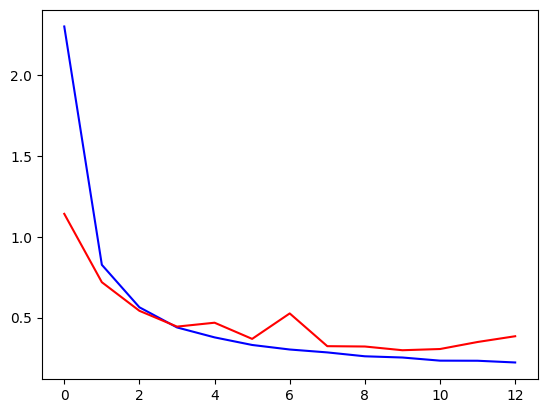

In [54]:
plt.plot(history.history['loss'],color = 'blue')
plt.plot(history.history['val_loss'], color = 'red')

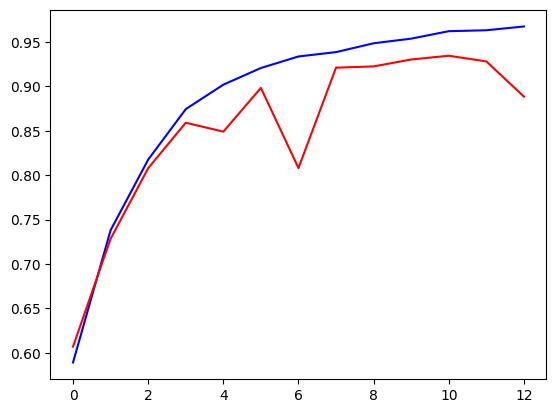

In [55]:
plt.plot(history.history['accuracy'],color = 'blue')
plt.plot(history.history['val_accuracy'], color = 'red')

In [56]:
model.save("Cat-vs-DOg.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
#1 dog
#0 cat
img = cv2.imread('/content/dog.5.jpg')

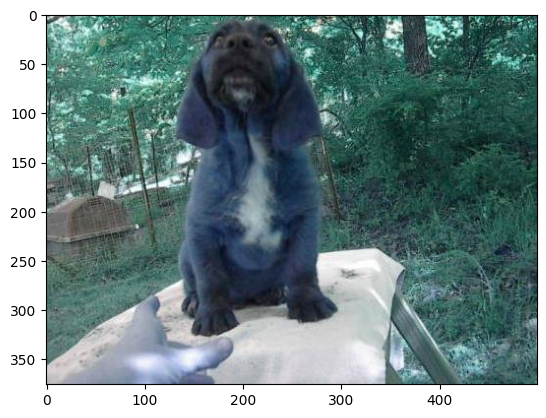

In [68]:
plt.imshow(img)

In [69]:
test_img = cv2.resize(img,(256,256))
test_input = test_img.reshape((1,256,256,3))
pred = model.predict(test_input)

1/1 [==============================] - 0s 23ms/step


In [70]:
if pred[0][0]<0.5:
  print("its a CAT")
elif pred[0][0]>0.5:
  print("its a DOG")
else: print('cant be defined')

its a DOG
